Importing relevant libraries for data wrangling

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_baseline = pd.DataFrame()
cols_list_baseline = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_baseline.append(i)

df_baseline_row_times = []
for i in range(0, 2588400, 3600):
    df_baseline_row_times.append(i)

df_baseline_col_names = ["time"]
for i in range(30):
    if i < 10:
        df_baseline_col_names.append("B0" + str(i))
    else:
        df_baseline_col_names.append("B" + str(i))

for i in range(30):
    if i < 10:
        df_baseline_col_names.append("S0" + str(i))
    else:
        df_baseline_col_names.append("S" + str(i))


for i in range(10):
    #df_k6_i = pd.DataFrame()
    df_baseline_i_list = []
    df_baseline_i_list.append(pd.read_csv("PRDE_Baseline_" + str(i) + "_strats.csv", header=None, usecols=cols_list_baseline))
    df_baseline_i = pd.concat(df_baseline_i_list)

    df_baseline_i.columns = df_baseline_col_names
    df_baseline_i.set_index("time", inplace=True)
    df_baseline[f"Total PPS {i}"] = df_baseline_i.sum(axis=1)

df_baseline["Mean PPS"] = df_baseline.sum(axis=1) / 10
df_baseline

,Total PPS 0,Total PPS 1,Total PPS 2,Total PPS 3,Total PPS 4,Total PPS 5,Total PPS 6,Total PPS 7,Total PPS 8,Total PPS 9,Mean PPS
time,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3600,51.241942,51.572218,59.144166,53.731111,57.800283,47.741390,52.682256,40.324259,49.891389,49.908893,51.403791
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,45.421111,47.071385,44.715276,49.482224,49.849218,49.685229,47.874725,52.118609,39.858793,46.252498,47.232907
14400,45.235692,47.297085,44.511076,49.444027,49.475395,49.720392,47.757918,52.440972,39.762870,46.324581,47.197001
...,...,...,...,...,...,...,...,...,...,...,...
2574000,61.802804,55.349352,63.925518,57.113470,55.907416,60.906086,62.428853,62.577075,60.176760,64.050218,60.423755
2577600,61.564044,55.238038,63.922339,57.241173,55.877991,60.957400,62.452779,62.748192,60.027253,64.134778,60.416399
2581200,62.818534,57.009867,63.186363,59.971884,59.172966,59.553218,63.965331,64.341663,60.363254,61.994201,61.237728


In [3]:
df_k6 = pd.DataFrame()
cols_list_k6 = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_k6.append(i)

df_k6_row_times = []
for i in range(0, 2588400, 3600):
    df_k6_row_times.append(i)

df_k6_col_names = ["time"]
for i in range(30):
    if i < 10:
        df_k6_col_names.append("B0" + str(i))
    else:
        df_k6_col_names.append("B" + str(i))

for i in range(30):
    if i < 10:
        df_k6_col_names.append("S0" + str(i))
    else:
        df_k6_col_names.append("S" + str(i))


for i in range(10):
    #df_k6_i = pd.DataFrame()
    df_k6_i_list = []
    df_k6_i_list.append(pd.read_csv("PRDE_Baseline_k=6_" + str(i) + "_strats.csv", header=None, usecols=cols_list_k6))
    df_k6_i = pd.concat(df_k6_i_list)

    df_k6_i.columns = df_k6_col_names
    df_k6_i.set_index("time", inplace=True)
    df_k6[f"Total PPS {i}"] = df_k6_i.sum(axis=1)

df_k6["Mean PPS"] = df_k6.sum(axis=1) / 10
df_k6

,Total PPS 0,Total PPS 1,Total PPS 2,Total PPS 3,Total PPS 4,Total PPS 5,Total PPS 6,Total PPS 7,Total PPS 8,Total PPS 9,Mean PPS
time,,,,,,,,,,,
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
3600,54.750280,50.693334,50.875321,53.377005,45.727776,48.493890,42.324999,54.073054,44.342296,50.866114,49.552407
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,48.259831,53.333333,48.996944,48.595275,54.681669,41.478703,48.304167,52.483610,50.730280,52.016110,49.887992
14400,0.000000,52.985139,48.979448,48.417362,54.761109,41.485832,48.606389,52.232358,50.564026,51.776671,44.980833
...,...,...,...,...,...,...,...,...,...,...,...
2574000,62.438037,64.379179,62.926116,62.171553,65.257869,65.099172,62.988433,60.657074,61.773107,62.573931,63.026447
2577600,62.383263,64.088574,62.841991,61.948573,65.306209,64.981841,63.062079,60.449549,61.773787,62.758561,62.959443
2581200,64.571806,61.196555,61.943977,61.404278,63.600031,64.602836,64.265114,62.626383,56.988796,64.652987,62.585276


In [4]:
df_k8 = pd.DataFrame()
cols_list_k8 = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_k8.append(i)

df_k8_row_times = []
for i in range(0, 2588400, 3600):
    df_k8_row_times.append(i)

df_k8_col_names = ["time"]
for i in range(30):
    if i < 10:
        df_k8_col_names.append("B0" + str(i))
    else:
        df_k8_col_names.append("B" + str(i))

for i in range(30):
    if i < 10:
        df_k8_col_names.append("S0" + str(i))
    else:
        df_k8_col_names.append("S" + str(i))


for i in range(10):
    df_k8_i_list = []
    df_k8_i_list.append(pd.read_csv("PRDE_Baseline_k=8_" + str(i) + "_strats.csv", header=None, usecols=cols_list_k8))
    df_k8_i = pd.concat(df_k8_i_list)

    df_k8_i.columns = df_k8_col_names
    df_k8_i.set_index("time", inplace=True)
    df_k8[f"Total PPS {i}"] = df_k8_i.sum(axis=1)

df_k8["Mean PPS"] = df_k8.sum(axis=1) / 10
df_k8

,Total PPS 0,Total PPS 1,Total PPS 2,Total PPS 3,Total PPS 4,Total PPS 5,Total PPS 6,Total PPS 7,Total PPS 8,Total PPS 9,Mean PPS
time,,,,,,,,,,,
0,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3600,53.124721,47.458612,40.896393,54.290835,45.345345,50.880278,55.953909,50.791390,52.645834,47.414226,49.880154
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,50.313059,49.001664,48.134111,51.273054,48.087223,56.074739,55.580001,45.315766,50.560556,48.165333,50.250551
14400,50.371253,49.291805,47.756363,51.075418,48.118471,56.212361,55.929724,45.253301,50.126946,48.223890,50.235953
...,...,...,...,...,...,...,...,...,...,...,...
2574000,65.206305,57.993557,61.636730,60.057918,65.272330,56.102649,63.316166,62.010333,58.155338,58.829884,60.858121
2577600,65.349597,57.857595,61.359027,60.208165,65.095971,56.404152,63.417228,62.064958,57.842874,58.956607,60.855617
2581200,66.548603,61.436533,62.169910,64.504755,65.127316,61.192599,64.587952,64.266822,61.272831,62.243083,63.335040


In [5]:
df_k10 = pd.DataFrame()
cols_list_k10 = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_k10.append(i)

df_k10_row_times = []
for i in range(0, 2588400, 3600):
    df_k10_row_times.append(i)

df_k10_col_names = ["time"]
for i in range(30):
    if i < 10:
        df_k10_col_names.append("B0" + str(i))
    else:
        df_k10_col_names.append("B" + str(i))

for i in range(30):
    if i < 10:
        df_k10_col_names.append("S0" + str(i))
    else:
        df_k10_col_names.append("S" + str(i))


for i in range(10):
    df_k10_i_list = []
    df_k10_i_list.append(pd.read_csv("PRDE_Baseline_k=10_" + str(i) + "_strats.csv", header=None, usecols=cols_list_k10))
    df_k10_i = pd.concat(df_k10_i_list)

    df_k10_i.columns = df_k10_col_names
    df_k10_i.set_index("time", inplace=True)
    df_k10[f"Total PPS {i}"] = df_k10_i.sum(axis=1)

df_k10["Mean PPS"] = df_k10.sum(axis=1) / 10
df_k10

,Total PPS 0,Total PPS 1,Total PPS 2,Total PPS 3,Total PPS 4,Total PPS 5,Total PPS 6,Total PPS 7,Total PPS 8,Total PPS 9,Mean PPS
time,,,,,,,,,,,
3600,55.653337,47.221667,55.673053,49.439723,48.859999,46.827221,49.655556,51.114445,47.295554,43.168410,49.490897
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,45.915835,57.136664,46.873055,49.943333,50.784168,44.246388,47.790555,57.412497,43.027023,46.891943,49.002146
14400,45.798752,57.401945,46.596945,50.061645,50.919719,43.995102,0.000000,57.460555,43.047914,47.080833,44.236341
18000,48.808506,44.566874,47.621612,47.976555,44.957983,44.877985,49.006894,53.211633,49.782728,47.579943,47.839071
...,...,...,...,...,...,...,...,...,...,...,...
2574000,58.990914,58.891774,61.598053,60.702635,57.944501,62.982459,61.460339,63.692539,61.479321,64.043004,61.178554
2577600,59.015627,58.959849,61.603615,60.687968,57.957966,63.318561,61.715183,64.043059,61.538061,64.060689,61.290058
2581200,63.635684,62.535769,65.197022,62.143535,66.139769,62.802322,63.564416,67.671304,64.848646,63.124586,64.166305


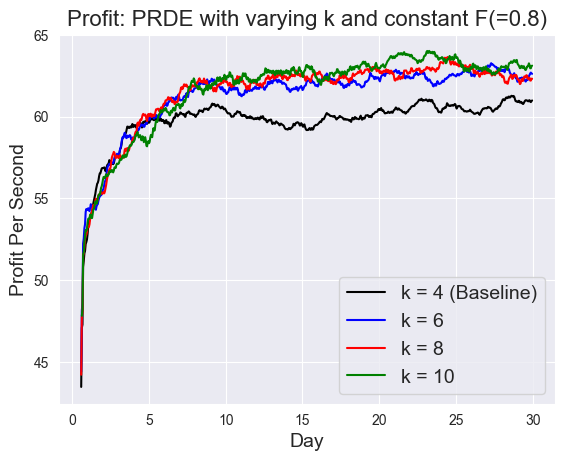

In [6]:
plt.plot((df_baseline.index / (60*60*24)), df_baseline["Mean PPS"].rolling(15).mean(), color="k", label="k = 4 (Baseline)", alpha=1)
plt.plot((df_k6.index / (60*60*24)), df_k6["Mean PPS"].rolling(15).mean(), color="b", label="k = 6", alpha=1)
plt.plot((df_k8.index / (60*60*24)), df_k8["Mean PPS"].rolling(15).mean(), color="r", label="k = 8", alpha=1)
plt.plot((df_k10.index / (60*60*24)), df_k10["Mean PPS"].rolling(15).mean(), color="g", label="k = 10", alpha=1)

plt.xlabel("Day", fontsize=14)
plt.ylabel("Profit Per Second", fontsize=14)
plt.title("Profit: PRDE with varying k and constant F(=0.8)", fontsize=16)

plt.legend(fontsize=14, loc="lower right")
plt.savefig("PRDE K Investigation.png")
plt.show()


In [ ]:
# Statistical Testing
